# Used Cars Analysis
### Sunpreet S. Chahal

##### I will be using an used car dataset within this notebook. I will be analysing the diveristy of options available over the stock present. 

*Used as a presentation of current skills 

#### Set-up

In [17]:
## Import libraries
import pandas as pd
import numpy as ny
import matplotlib.pyplot as mpy
import matplotlib as mtp
import seaborn as sns

In [18]:
## Import Dataframe 
#Duplicate backslashes (\) if cannot load df.
carsdb = pd.read_csv("D:\\PROJECTS\\Used Cars\\Used Car Dataset ORIGINAL.csv")

#Get info of the dataframe
carsdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   manufacturer_name       38531 non-null  object 
 1   model_name              38531 non-null  object 
 2   transmission            38531 non-null  object 
 3   colour                  38531 non-null  object 
 4   mileage                 38531 non-null  int64  
 5   year_produced           38531 non-null  int64  
 6   engine_fuel             38531 non-null  object 
 7   engine_has_gas          38531 non-null  bool   
 8   engine_type             38531 non-null  object 
 9   engine_capacity         38521 non-null  float64
 10  body_type               38531 non-null  object 
 11  has_warranty            38531 non-null  bool   
 12  state                   38531 non-null  object 
 13  drivetrain              38531 non-null  object 
 14  price_usd               38531 non-null

In [19]:
##Convert US terms into UK terms
#Save the replaced terms in the given function
carsdb = carsdb.replace('mechanical', 'manual')
carsdb = carsdb.replace('gasoline', 'petrol')
carsdb = carsdb.replace('sedan', 'saloon')
carsdb = carsdb.replace('universal', 'suv')
carsdb = carsdb.replace('minivan', 'van')

In [20]:
#Present Changes
carsdb

,manufacturer_name,model_name,transmission,colour,mileage,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed (Days)
0,Subaru,Outback,automatic,silver,190000,2010,petrol,False,petrol,2.5,suv,False,owned,all,10900.00,False,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,petrol,False,petrol,3.0,suv,False,owned,all,5000.00,True,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,petrol,False,petrol,2.5,suv,False,owned,all,2800.00,True,4,72,151
3,Subaru,Impreza,manual,blue,10000,1999,petrol,False,petrol,3.0,saloon,False,owned,all,9999.00,True,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,petrol,False,petrol,2.5,suv,False,owned,all,2134.11,True,14,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,petrol,False,petrol,3.5,saloon,False,owned,front,2750.00,True,5,85,301
38527,Chrysler,PT Cruiser,manual,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,4,20,317
38528,Chrysler,300,automatic,blue,777957,2000,petrol,False,petrol,3.5,saloon,False,owned,front,4300.00,False,3,63,369
38529,Chrysler,PT Cruiser,manual,black,20000,2001,petrol,False,petrol,2.0,van,False,owned,front,4000.00,True,7,156,490


### Visualising/Analysing DF

#### Manufacturers of the cars
Analyse the different manufacturers of the cars, then visualise to see the brand diversity within this dataset

In [21]:
##Count the amount of vehicles with Manual/Automatic Transmissions

#Count the amount of vehicles per brand
carsdb['Count'] = 1
macars = carsdb.groupby(['manufacturer_name']).count()['Count']

In [22]:
##Present a sample of the code above
macars.head()

manufacturer_name
Acura           66
Alfa Romeo     207
Audi          2468
BMW           2610
Buick           47
Name: Count, dtype: int64

In [23]:
##I want work with the top 10~ brands since they take up a more significant amount of the stock
macars = macars.sort_values()
macars.tail(5)

manufacturer_name
Renault       2493
Ford          2566
BMW           2610
Opel          2759
Volkswagen    4243
Name: Count, dtype: int64

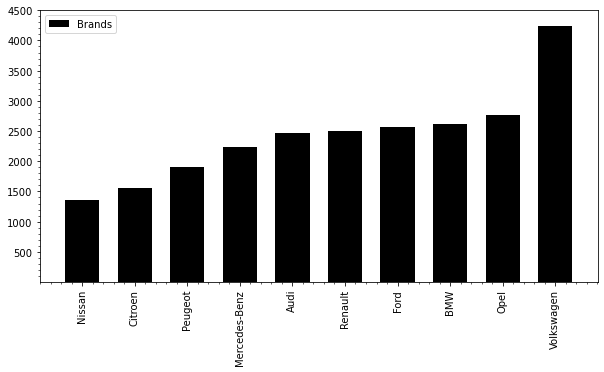

In [24]:
##Create a bar chart for various brands of the cars
#Supply Values
labels = ['Nissan','Citroen','Peugeot','Mercedes-Benz','Audi','Renault','Ford','BMW','Opel','Volkswagen'  ]
values = [1361,1562,1909,2237,2468,2493,2566,2610,2759,4243]
mpy.figure(figsize= (10,5))

##Plot Data
col_cman = mpy.bar(labels, values, width = 0.65, label = 'Brands', color=['black'])
mpy.yticks([500,1000,1500,2000,2500,3000,3500,4000,4500])
mpy.xticks(labels, rotation= 'vertical')
mpy.minorticks_on()

##Present Data
mpy.legend()
mpy.show(col_cman)


#### Body type of the cars
Analyse the different body options for the cars, and to visualise each body-type. 

In [25]:
##Count the amount of vehicles with Manual/Automatic Transmissions
carsdb['Count'] = 1
carbod = carsdb.groupby(['body_type']).count()['Count']

In [26]:
carbod.sort_values()

body_type
limousine       12
cabriolet       75
pickup         129
liftback       552
coupe          652
minibus       1369
van           4416
hatchback     7644
suv          10671
saloon       13011
Name: Count, dtype: int64

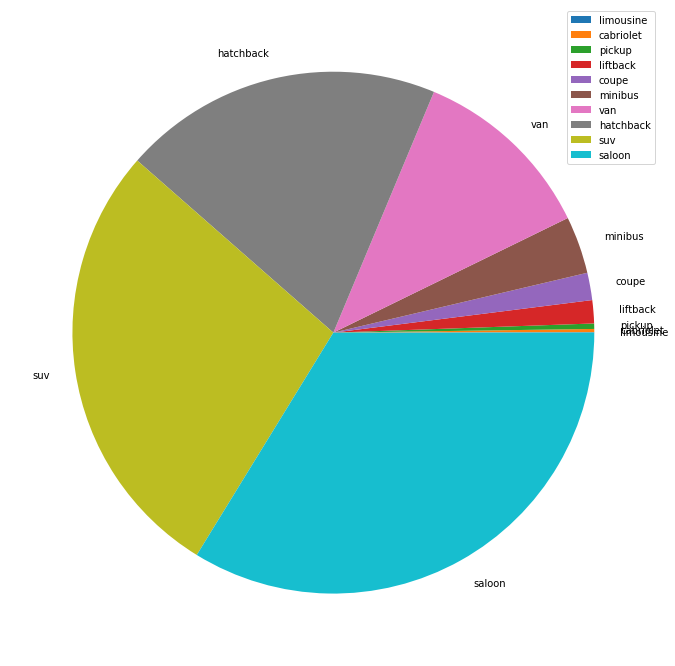

In [27]:
##Create a pie chart for the different transmissions
#Supply Values
bodcount = [12,75,129,552,652,1369,4416,7644,10671,13011]
bodlabels = ['limousine','cabriolet','pickup','liftback','coupe','minibus','van','hatchback','suv','saloon']
mpy.figure(figsize= (15,12))

##Plot pie
bod_pie = mpy.pie(bodcount, labels = bodlabels)

##Present
mpy.legend()
mpy.show(bod_pie)

#### Colours of the cars
Analyse the different colour options for the cars, and to visualise each body-type to see the diverity of colour options

In [28]:
##Count the different body-types of the cars 
carsdb['Count'] = 1
colcars = carsdb.groupby(['colour']).count()['Count']

In [29]:
colcars.head(5)

colour
black    7705
blue     5802
brown     886
green    2760
grey     3751
Name: Count, dtype: int64

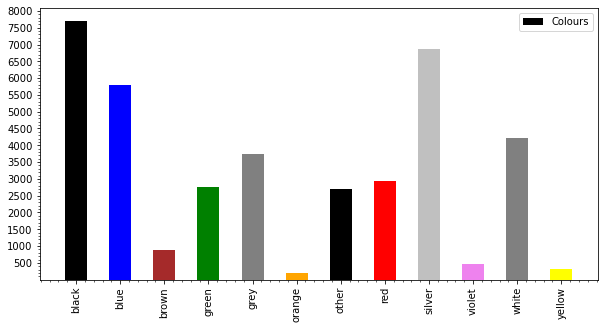

In [30]:
##Create a bar chart for various colours of the cars
#Supply Values
labels = ['black','blue','brown','green','grey','orange','other','red','silver','violet','white','yellow' ]
colour_values = [7705,5802,886,2760,3751,184,2688,2925,6852,463,4212,303]
mpy.figure(figsize= (10,5))

##Plot Data
col_bar = mpy.bar(labels, colour_values, width = 0.5, label = 'Colours', color=['black','blue','brown','green','grey','orange','black','red','silver','violet','grey','yellow'])
mpy.yticks([500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000])
mpy.xticks(labels, rotation= 'vertical')
mpy.minorticks_on()

##Present Data
mpy.legend()
mpy.show(col_bar)

## White/Other not available and have been subsituted for another colour

#### Production year of the cars 
Analyse the production years of the present cars, visualise to the diversity of the production years of the cars

In [35]:
##Create a variable for each decade, us; .between (*value1, *value*) to select a range 
#Create another variable to sum up all of the True values, then plot values within a chart
dec40s = carsdb['year_produced'].between(1940, 1949, inclusive=False).sort_values(ascending=False)
d40s = sum(dec40s)

dec50s = carsdb['year_produced'].between(1950, 1960, inclusive=False).sort_values()
d50s = sum(dec50s)

dec60s = carsdb['year_produced'].between(1960, 1970, inclusive=False).sort_values()
d60s = sum(dec50s)

dec70s = carsdb['year_produced'].between(1970, 1980, inclusive=False).sort_values()
d70s = sum(dec70s)

dec80s = carsdb['year_produced'].between(1980, 1990, inclusive=False).sort_values()
d80s = sum(dec80s)

dec90s = carsdb['year_produced'].between(1990, 2000, inclusive=False).sort_values()
d90s = sum(dec80s)

dec00s = carsdb['year_produced'].between(2000, 2010, inclusive=False).sort_values()
d00s = sum(dec00s)

dec10s = carsdb['year_produced'].between(2010, 2020, inclusive=False).sort_values()
d10s = sum(dec10s)

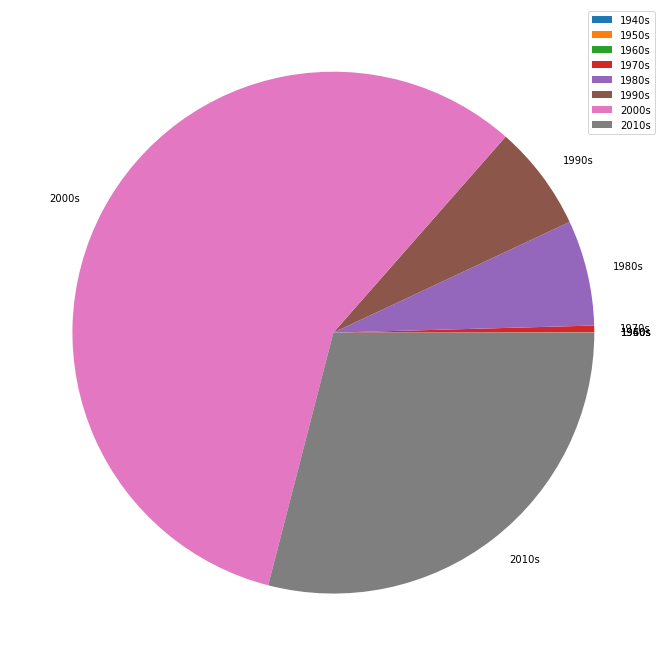

In [36]:
##Create a pie chart for the different catergoiries of production years 
#Supply Values
tcount = [d40s, d50s,d60s, d70s, d80s, d90s, d00s, d10s]
tlabels = ['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s']
mpy.figure(figsize= (15,12))

##Plot pie
yr_pie = mpy.pie(tcount, labels = tlabels)

##Present
mpy.legend()
mpy.show(yr_pie)

#### Transmission of the cars

In [33]:
##Count the amount of vehicles with Manual/Automatic Transmissions
carsdb['Count'] = 1
tcars = carsdb.groupby(['transmission']).count()['Count']

In [34]:
tcars

transmission
automatic    12898
manual       25633
Name: Count, dtype: int64

In [ ]:
##Create a pie chart for the different transmissions
#Supply Values
tcount = [12898, 25633]
tlabels = ['Auto', 'Manual']
mpy.figure(figsize= (10,5))

##Plot pie
t_pie = mpy.pie(tcount, labels = tlabels)

##Present
mpy.legend()
mpy.show(t_pie)